In [15]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image

In [16]:
image = Image.open("images/elon.jpeg")
mask = Image.open("images/mask.jpeg")
mask2 = Image.open("images/second_mask.jpeg")

In [17]:
# Convert to numpy arrays FIRST
image = np.array(image)
mask = np.array(mask) # np.asarray(mask), np.array(mask)
mask2 = np.array(mask2)

# NOW check and resize mask to match image dimensions
if image.shape[:2] != mask.shape[:2]:
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

if image.shape[:2] != mask2.shape[:2]:
    mask2 = cv2.resize(mask2, (image.shape[1], image.shape[0]))

In [18]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0)
    ]
)

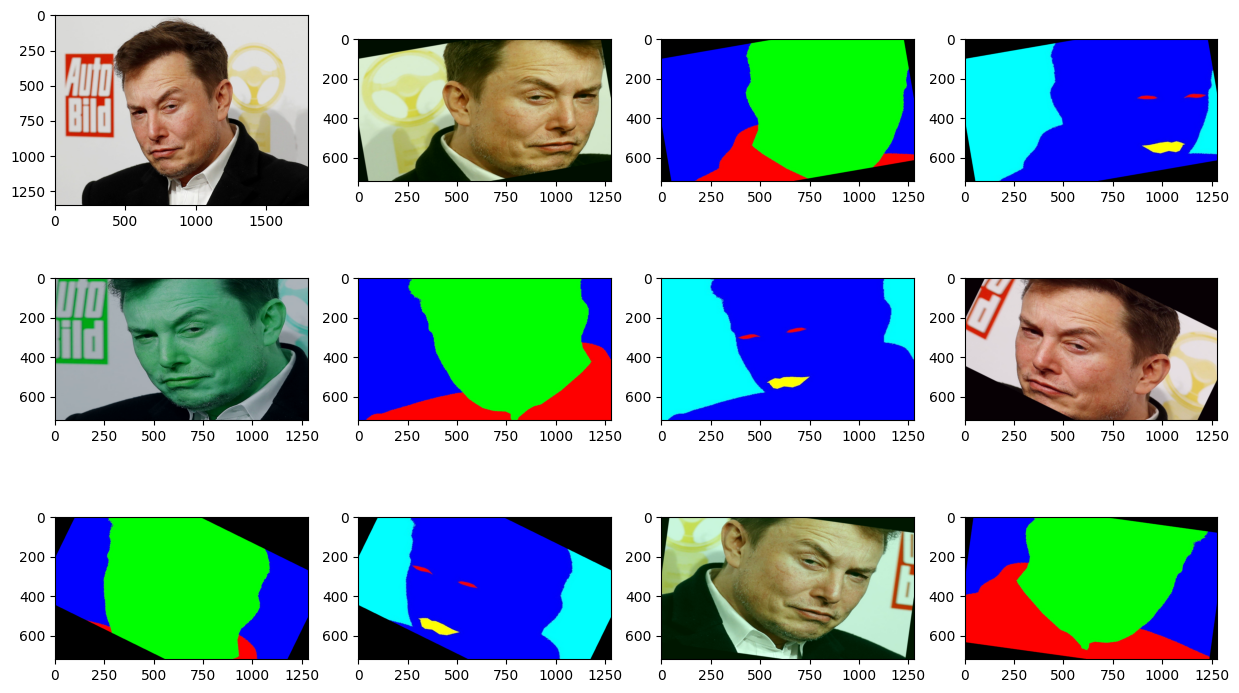

In [19]:
images_list = [image]
for i in range(4):
    # augmentations = transform(image=image, mask=mask)
    augmentations = transform(image=image, masks=[mask, mask2])
    augmented_img = augmentations["image"]
    augmented_masks = augmentations["masks"]
    images_list.append(augmented_img)
    images_list.append(augmented_masks[0])
    images_list.append(augmented_masks[1])
plot_examples(images_list)